Simple Pharmacokinetics modelling in Python.   
Will Wood 22/12/2020

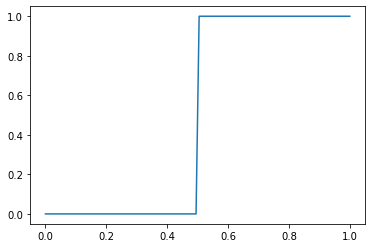

In [1]:
# introduction to the numpy piecewise function
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 100)
f = np.piecewise(x, [x<0.5, x>=0.5], [0, 1])
plt.plot(x, f)

In [2]:
# the IV bolus model (single dose)
def IV_bolus(t, t0, dose, ke, vd):
    f = np.piecewise(t, [t<t0, t>=t0],[0, lambda t : (dose/vd)*(np.exp(-ke*(t-t0)))])
    return f

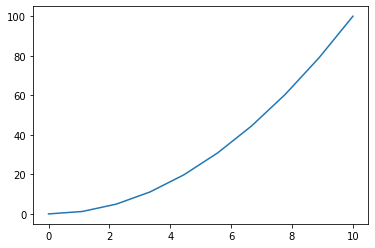

In [3]:
# lambda notation
x = np.linspace(0, 10, 10)
y = lambda x : x**2
plt.plot(x, y(x))

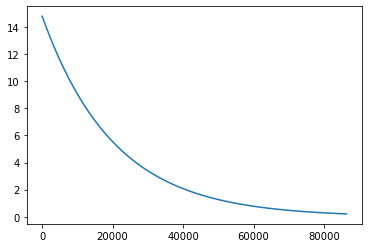

In [4]:
# the IV bolus model (single dose)
Vd = 40.6 # L
Ke = 4.91E-5 # s-1
Dose = 600 # mg

t= np.linspace(0, 24*3600, 24*3600)

Ct = IV_bolus(t=t, t0=0, dose=Dose, ke=Ke, vd=Vd)
plt.plot(t,Ct)

In [5]:
# the IV bolus model (multiple doses)
def PlasmaConcentration(dose_interval, Tmax, dose, vd, ke):
    
    t = np.linspace(0, Tmax, Tmax)
    Number_of_doses = int(float(Tmax)/dose_interval)
    start_times = [ n * dose_interval for n in range(Number_of_doses)]
    
    concentration_time = np.zeros(Tmax)
    
    for t0 in start_times:
        concentration_time += IV_bolus(t, t0, dose, ke, vd)
    
    return concentration_time, t


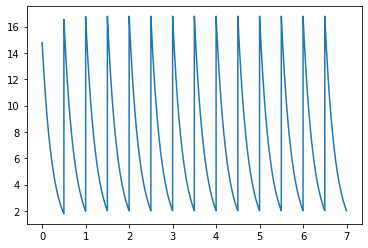

In [6]:
# the IV bolus model (multiple doses)
Vd = 40.6 # L
Ke = 4.91E-5 # s-1
Dose = 600 # mg
Dose_interval = 12*3600 # s
Tmax = 7*24*3600 # s

Ct, t = PlasmaConcentration(dose_interval= Dose_interval, Tmax=Tmax, dose=Dose, vd=Vd, ke=Ke)
plt.plot(t/(24*3600), Ct)


In [7]:
# the oral model (single dose)
def Oral_bolus(t, t0, dose, ka, ke, vd):
    if ka != ke:
        C = dose * ka / (vd*(ka-ke))
        f = np.piecewise(t,
                        [t<t0, t>=t0],
                        [0, lambda t: C * (np.exp(-ke*(t-t0)) - np.exp(-ka*(t-t0)))])
    else: # ka==ke
        K=ka
        C = (dose * K) / vd
        f = np.piecewise(t,
                        [t<t0, t>=t0],
                        [0, t * C *(np.exp(-K*(t-t0)))])
    return f
        

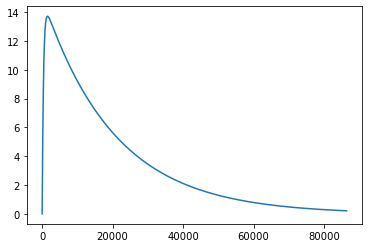

In [8]:
# the oral model (single dose)
t = np.linspace(0, 24*3600, 24*3600)
Vd = 40.6 # L
Ke = 4.91E-5 # s-1
Dose = 600 # mg
Ka = 2.67E-3 # s-1
Tmax = 24*3600 # s

Ct = Oral_bolus(t=t, t0=0, dose=Dose, ka=Ka, ke=Ke, vd=Vd)
plt.plot(t,Ct)

In [9]:
# function for both oral and IV routes (multiple doses)
def PlasmaConcentration(dose_interval, Tmax, dose, vd, ka, ke, route="oral"):
    
    t = np.linspace(0, Tmax, Tmax)
    Number_of_doses = int(float(Tmax)/dose_interval)
    start_times = [ n * dose_interval for n in range(Number_of_doses)]
    
    concentration_time = np.zeros(Tmax)
    for t0 in start_times:
        if route == "IV":
            concentration_time += IV_bolus(t, t0, dose, ke, vd)
        elif route == "oral":
            concentration_time += Oral_bolus(t, t0, dose, ka, ke, vd)
        else:
            print("Route not valid")
    return concentration_time, t

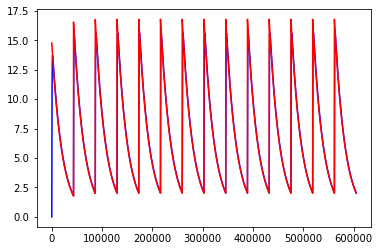

In [10]:
# function for both oral and IV routes (multiple doses)
Vd = 40.6 # L
Ke = 4.91E-5 # s-1
Dose = 600 # mg
Ka = 2.67E-3 # s-1
Tmax = 7*24*3600 # s
Dose_interval = 12*3600
Ct_oral, t = PlasmaConcentration(dose_interval=Dose_interval, Tmax=Tmax, dose=Dose, vd=Vd, ka=Ka, ke=Ke, route="oral")
Ct_IV, t = PlasmaConcentration(dose_interval=Dose_interval, Tmax=Tmax, dose=Dose, vd=Vd, ka=Ka, ke=Ke, route="IV")

plt.plot(t, Ct_oral, color='b')
plt.plot(t, Ct_IV, color='r')